<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/spatial_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

In [ ]:
url = "https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/notebooks/bank.jpeg"
with urllib.request.urlopen(url) as url:
    img = plt.imread(url, format='jpg')
plt.imshow(img)
plt.axis('off')

print(img.shape)

In [ ]:
r_mask = img[:, :, 0]
g_mask = img[:, :, 1]
b_mask = img[:, :, 2]

#turn image to gray
g_img = r_mask*0.2989 + g_mask*0.5870 + b_mask*0.1140 #gray
u_img = np.uint8(g_img) #unsigned

Apply filter

In [ ]:
F1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]) #Identity
F2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]) #Edge detection
F3 = 1/9*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) #Box blur
F4 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) #Sharpen kernell
F5 = 1/256*np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]) #Gaussian Filter

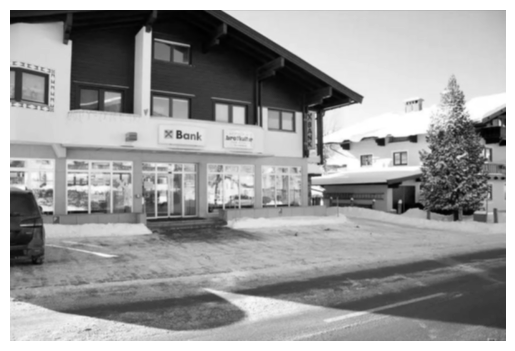

In [20]:
import cv2
# F=F1
# F=F2
F=F3
# F=F4
# F=F5
new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F)

plt.imshow(new_img, cmap='gray')
plt.axis('off');

AVG filltering & Threshold

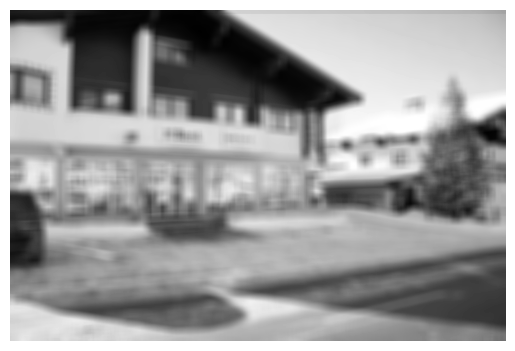

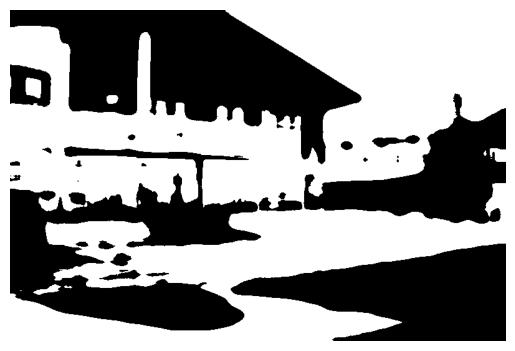

In [30]:
import cv2
F = np.ones((15,15))/225

new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F)
plt.imshow(new_img, cmap='gray')
plt.axis('off');
plt.figure()
new_img = new_img > 150
plt.imshow(new_img, cmap='gray')
plt.axis('off');

Dif filtering & Threshold

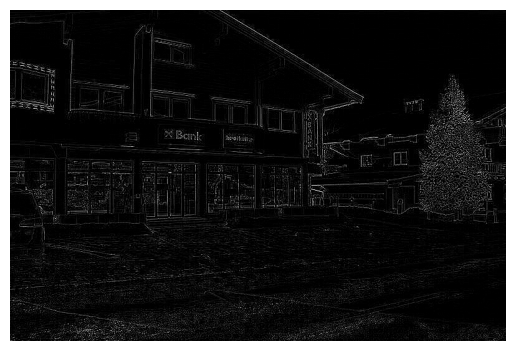

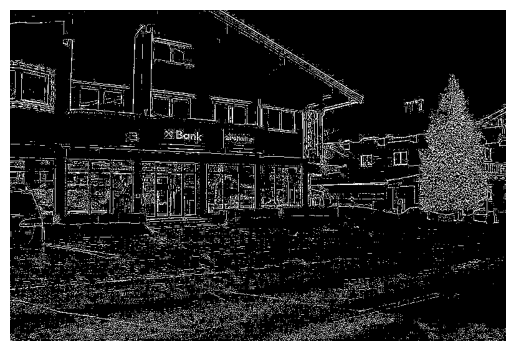

In [37]:
import cv2
F = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F)
plt.imshow(new_img, cmap='gray')
plt.axis('off');
plt.figure()
new_img = new_img > 30
plt.imshow(new_img, cmap='gray')
plt.axis('off');

Enhance/sharpen

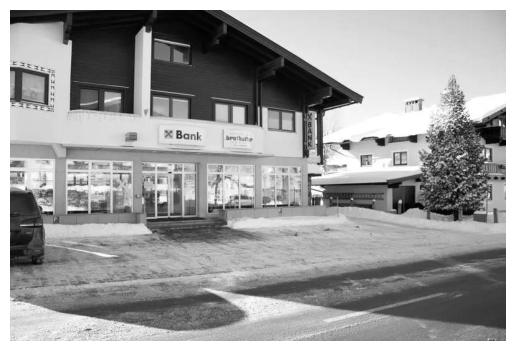

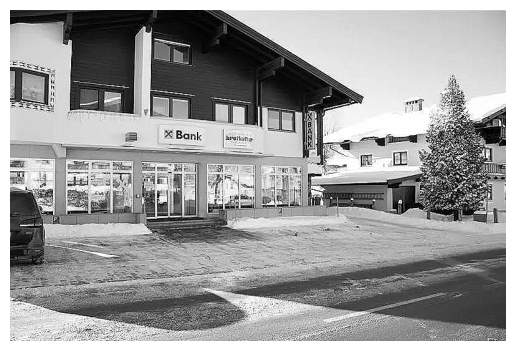

In [45]:
import cv2
F = np.array([[0,0,0],[0,1,0],[0,0,0]]) - np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F)
plt.imshow(u_img, cmap='gray')
plt.axis('off');
plt.figure()
# new_img = new_img > 30
plt.imshow(new_img, cmap='gray')
plt.axis('off');

High pass filter

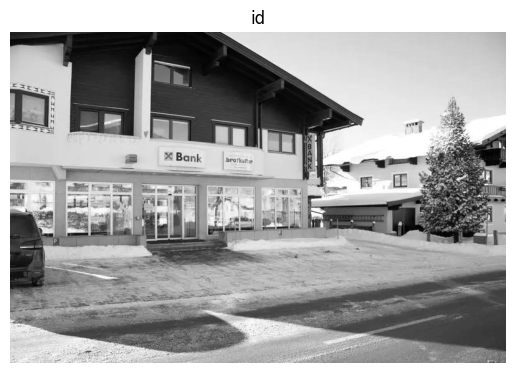

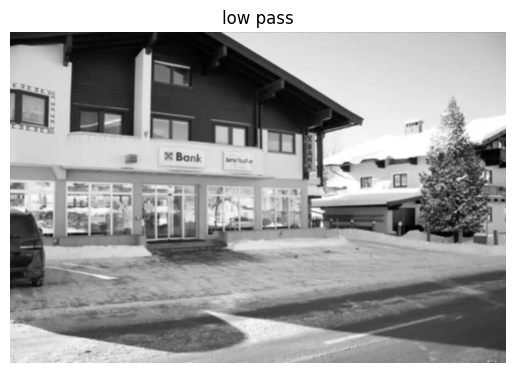

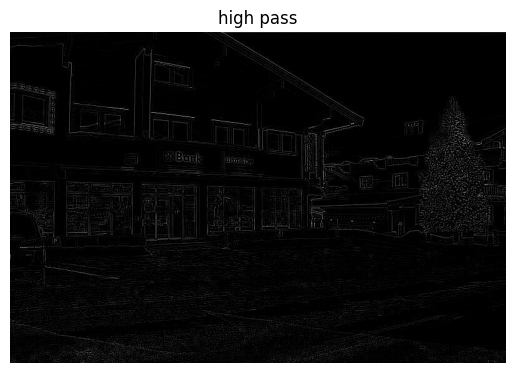

In [52]:
import cv2
kernel_size = 3
F_id = np.array([[0,0,0],[0,1,0],[0,0,0]])
F_lp = np.ones((kernel_size,kernel_size))*1/kernel_size**2
F_hp = F_id - F_lp
# np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F_id)
plt.imshow(new_img, cmap='gray')
plt.title('id')
plt.axis('off');
plt.figure()
new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F_lp)
plt.imshow(new_img, cmap='gray')
plt.title('low pass')
plt.axis('off');
plt.figure()
new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F_hp)
plt.imshow(new_img, cmap='gray')
plt.title('high pass')
plt.axis('off');

Unsharp masking

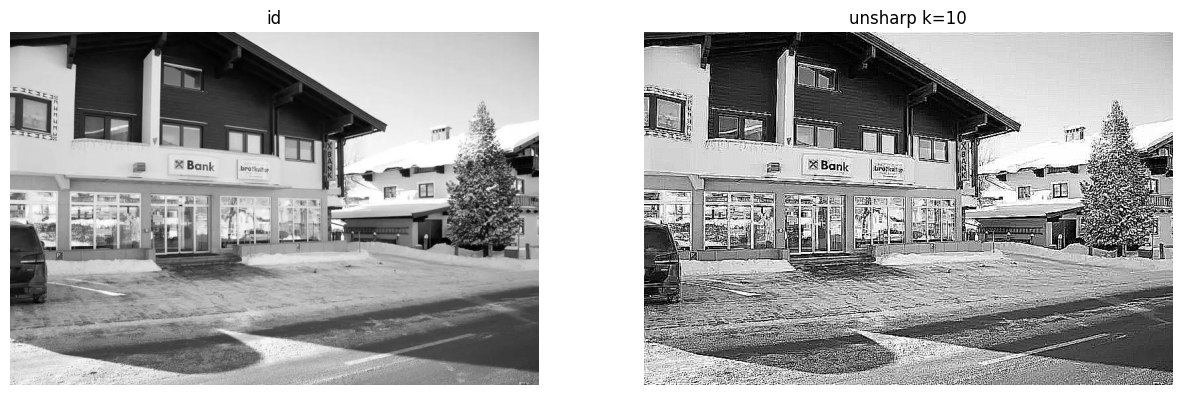

In [63]:
import cv2
kernel_size = 3
F_id = np.array([[0,0,0],[0,1,0],[0,0,0]])
F_lp = np.ones((kernel_size,kernel_size))*1/kernel_size**2
F_hp = F_id - F_lp
k = 10
F = F_id + k*F_hp

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(u_img, cmap='gray')
plt.title('id')
plt.axis('off');
plt.subplot(1,2,2)
new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F)
plt.imshow(new_img, cmap='gray')
plt.title(f'unsharp k={k}')
plt.axis('off');

Sobel Filter

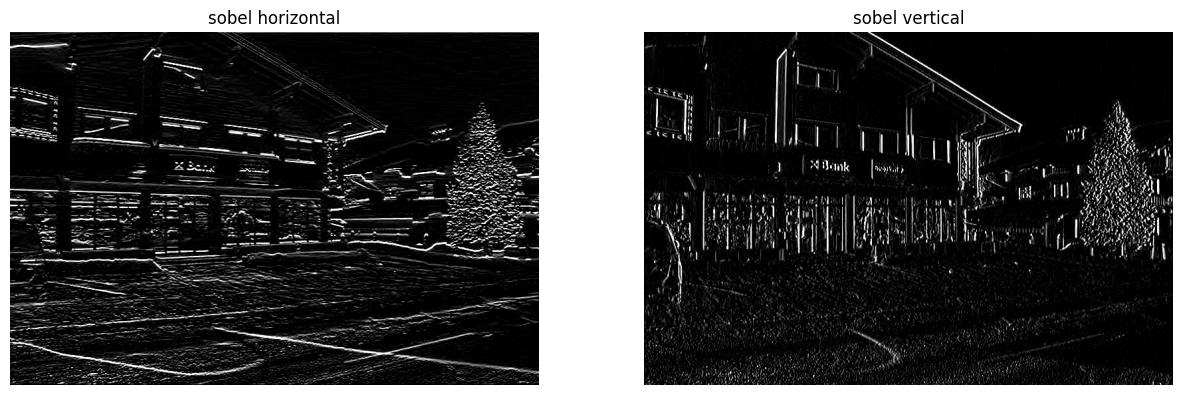

In [65]:
import cv2
F_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
F_v = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F_h)
plt.imshow(new_img, cmap='gray')
plt.title('sobel horizontal')
plt.axis('off');
plt.subplot(1,2,2)
new_img = cv2.filter2D(u_img, ddepth=-1, kernel=F_v)
plt.imshow(new_img, cmap='gray')
plt.title(f'sobel vertical')
plt.axis('off');

# Non linear filters

Median filter

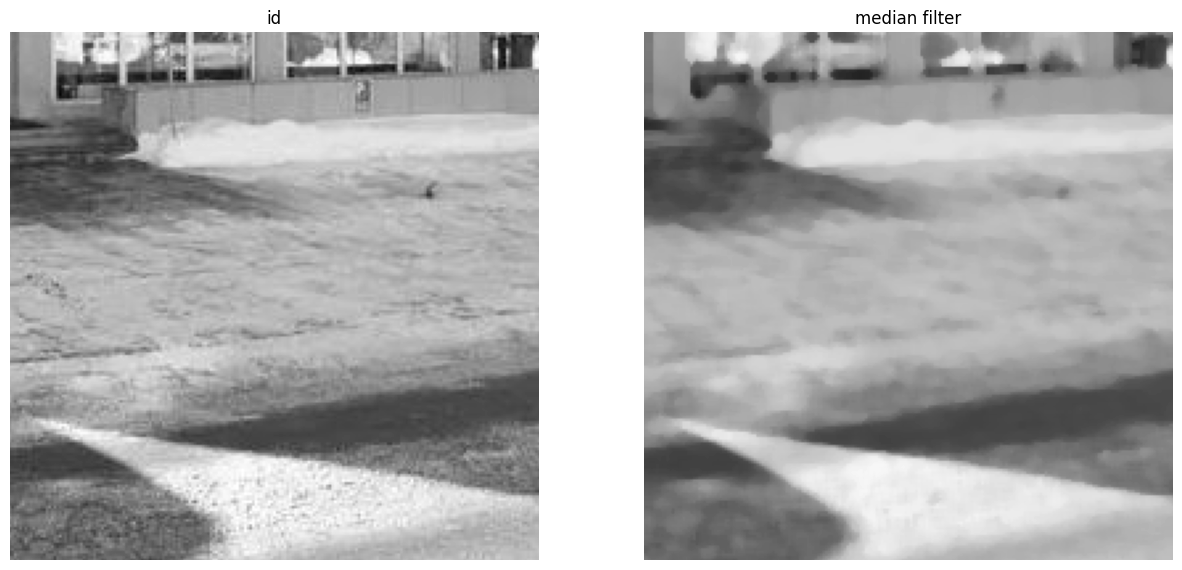

In [80]:
import cv2
size = 5

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(u_img, cmap='gray')
plt.title('id')
plt.axis('off');
plt.ylim([500, 300])
plt.xlim([300, 500])
plt.subplot(1,2,2)
new_img = cv2.medianBlur(u_img, size)
plt.imshow(new_img, cmap='gray')
plt.title(f'median filter')
plt.ylim([500, 300])
plt.xlim([300, 500])
plt.axis('off');